# XG BOOST Regression

## Importing the libraries

In [285]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [286]:
dataset = pd.read_csv('Data.csv.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [287]:
print(X)

[['groundnut' 1 'ADILABAD' '2016-2017' 'kharif' 0]
 ['groundnut' 11 'KOMARAM BHEEM' '2016-2017' 'kharif' 0]
 ['groundnut' 13 'MANCHERIAL' '2016-2017' 'kharif' 1930]
 ...
 ['bengal gram' 19 'NALGONDA' '2018-2019' 'rabi' 1569]
 ['bengal gram' 28 'SURYAPET' '2018-2019' 'rabi' 1569]
 ['bengal gram' 10 'KHAMMAM' '2018-2019' 'rabi' 1569]]


## Encoding categorical data

In [288]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [289]:
print(X[0,:])

[1.0 0.0 'groundnut' 1 'ADILABAD' '2016-2017' 0]


In [290]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [291]:
print(X[0,:])

[1.0 0.0 0.0 1.0 0.0 'groundnut' 1 'ADILABAD' 0]


In [292]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [293]:
print(X[0,:])

[0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1 'ADILABAD' 0]


In [309]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [310]:
print(X[0,:])

[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0
 1.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1 0]


## Splitting the dataset into the Training set and Test set

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the XG BOOST Regression model

In [312]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predicting the Test set results

In [314]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1299 1299]
 [2140 2132]
 [1516 1516]
 [2489 2500]
 [3929 2995]
 [1353 4966]
 [2068 2068]
 [1516 1516]
 [1299 1060]
 [2186 2815]
 [1675 1558]
 [6306 6612]
 [1569 1569]
 [1526 1622]
 [3122 4963]
 [3068 2207]
 [3815 2886]
 [2491 3130]
 [5464 5433]
 [6052 5438]
 [1791 1791]
 [1366 3610]
 [2332 1474]
 [1516 1769]
 [6397 2126]
 [1569 1824]
 [1340 4916]
 [7716 6999]
 [1299 1299]
 [2489 2496]
 [3815 3293]
 [1463 2630]
 [1569 1569]
 [1240 4558]
 [7544 6300]
 [1299 1299]
 [5909 5300]
 [   0    0]
 [5892 2245]
 [1421 2049]
 [5263 1950]
 [7544 7753]
 [5478 2815]
 [2066 2066]
 [2458 1611]
 [2066 1928]
 [1569 1569]
 [1516 1516]
 [2068 2068]
 [1299 1299]
 [3249 2045]
 [2186 2370]
 [1516 1516]
 [1569 1138]
 [6026 1603]
 [1748 4900]
 [4790 2489]
 [2236 2236]
 [3815 2886]
 [   0    0]
 [3023 2238]
 [1299    0]
 [1299 1299]
 [2300 2052]
 [1569 1569]
 [1576 3231]
 [1421 2666]
 [2068 2049]
 [1569 1569]
 [3929 2229]
 [   0    0]
 [2062 2940]
 [2140 2132]
 [1516 1516]
 [1569 1268]
 [1353 4966]
 [2489 2489]

In [320]:
from sklearn.metrics import r2_score
r1 = (r2_score(y_test,y_pred)*4)
r1

0.8238980356412453

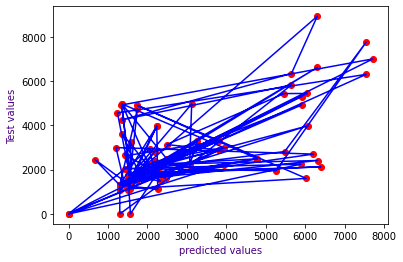

In [322]:
plt.scatter(y_pred, y_test, color = 'red')
plt.plot(y_pred, y_test, color = 'blue')
plt.xlabel('predicted values',color = 'indigo')
plt.ylabel('Test values',color = 'indigo')
plt.show()